# **Delivery Time Prediction**

### **Introduction About the Data** :

**The dataset** The goal is to predict `time` taken by delivery person (Regression Analysis).

There are 19 independent variables (including `ID`, `Delivery_person_ID`):

* `ID` : unique identifier of each restaurant.
* `Delivery_person_ID` : unique identifier of each delivery person.
* `Delivery_person_Age` : Delivery Person's age.
* `Delivery_person_Ratings` : Ratings given by customer to the Delivery person.
* `Restaurant_latitude` : Restaurant's latitude.
* `Restaurant_longitude` : Restaurant's longitude.
* `Delivery_location_latitude` : Delivery Location's latitude.
* `Delivery_location_longitude` : Delivery Location's longitude.
* `Order_Date` : Date of order placed.
* `Time_Orderd` : Time at which order has been placed.
* `Time_Order_picked` : Time at which order picked-up by the Delivery Person.
* `Weather_conditions` : Weather Condition at the time of delivery.
* `Road_traffic_density` : Traffic Condition at the time of delivery.
* `Vehicle_condition` : Vehicle Condition.
* `Type_of_order` : Type of order placed by the customer.
* `Type_of_vehicle` : Type of vehicle used for delivering order.
* `multiple_deliveries` : number of deliveries per day.
* `Festival` : Is there any festival on delivery date.
* `City` : Type of city where order has to be delivered. 

Target variable:
* `Time_taken`: Time taken by the delivery person to deliver the order placed.

Dataset Source Link :
https://drive.google.com/file/d/1tr1ozeDCuE9AvoL0D7l00hjfl-k83Yab/view

#### **Importing required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import geopy.distance
pd.options.display.max_columns = None               #make all columns visible when printing the dataframe

#### **1. Data Reading**

In [2]:
dataset = pd.read_csv("data/finalTrain.csv")
display(dataset.shape)
dataset.head()

(45584, 20)

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings   
0  0xcdcd      DEHRES17DEL01                 36.0                      4.2  \
1  0xd987      KOCRES16DEL01                 21.0                      4.7   
2  0x2784     PUNERES13DEL03                 23.0                      4.7   
3  0xc8b6     LUDHRES15DEL02                 34.0                      4.3   
4  0xdb64      KNPRES14DEL02                 24.0                      4.7   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude   
0            30.327968             78.046106                   30.397968  \
1            10.003064             76.307589                   10.043064   
2            18.562450             73.916619                   18.652450   
3            30.899584             75.809346                   30.919584   
4            26.463504             80.372929                   26.593504   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked   
0                    78.116106  12-02-2022       21:55             22:10  \
1                    76.347589  13-02-2022       14:55             15:05   
2                    74.006619  04-03-2022       17:30             17:40   
3                    75.829346  13-02-2022       09:20             09:30   
4                    80.502929  14-02-2022       19:50             20:05   

  Weather_conditions Road_traffic_density  Vehicle_condition Type_of_order   
0                Fog                  Jam                  2         Snack  \
1             Stormy                 High                  1          Meal   
2         Sandstorms               Medium                  1        Drinks   
3         Sandstorms                  Low                  0        Buffet   
4                Fog                  Jam                  1         Snack   

  Type_of_vehicle  multiple_deliveries Festival           City   
0      motorcycle                  3.0       No  Metropolitian  \
1      motorcycle                  1.0       No  Metropolitian   
2         scooter                  1.0       No  Metropolitian   
3      motorcycle                  0.0       No  Metropolitian   
4         scooter                  1.0       No  Metropolitian   

   Time_taken (min)  
0                46  
1                23  
2                21  
3                20  
4                41

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

**observation from data reading** --->
- There are 45584 records available and 
- 20 features for each record.

#### **2. Data Cleaning**
- Clean target and other features from unnecessary information.
- Handling NaN Values.

In [4]:
## Renaming target variable name, removing min from the name 

dataset.rename(columns={"Time_taken (min)": "delivery_time_taken"}, inplace=True)
dataset.head(1)

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings   
0  0xcdcd      DEHRES17DEL01                 36.0                      4.2  \

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude   
0            30.327968             78.046106                   30.397968  \

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked   
0                    78.116106  12-02-2022       21:55             22:10  \

  Weather_conditions Road_traffic_density  Vehicle_condition Type_of_order   
0                Fog                  Jam                  2         Snack  \

  Type_of_vehicle  multiple_deliveries Festival           City   
0      motorcycle                  3.0       No  Metropolitian  \

   delivery_time_taken  
0                   46

##### 2.1 dropping id and delivery_perdon_id as its a unique value

In [5]:
dataset.drop(labels=['ID','Delivery_person_ID'], axis=1, inplace=True)
dataset.head(2)

Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude   
0                 36.0                      4.2            30.327968  \
1                 21.0                      4.7            10.003064   

   Restaurant_longitude  Delivery_location_latitude   
0             78.046106                   30.397968  \
1             76.307589                   10.043064   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked   
0                    78.116106  12-02-2022       21:55             22:10  \
1                    76.347589  13-02-2022       14:55             15:05   

  Weather_conditions Road_traffic_density  Vehicle_condition Type_of_order   
0                Fog                  Jam                  2         Snack  \
1             Stormy                 High                  1          Meal   

  Type_of_vehicle  multiple_deliveries Festival           City   
0      motorcycle                  3.0       No  Metropolitian  \
1      motorcycle                  1.0       No  Metropolitian   

   delivery_time_taken  
0                   46  
1                   23

##### 2.2 checking for duplicates 

In [5]:
dataset.duplicated().sum()

0

##### 2.3 Looking for NaN values 

In [6]:
dataset.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
delivery_time_taken               0
dtype: int64

In [7]:
dataset.Time_Orderd.isnull().sum()

1731

In [8]:
'''
It seems "Time_orderd" strings have a float and some other format values that is replaced with proper values
'''
dataset['Time_Orderd'] = dataset['Time_Orderd'].apply(lambda x : "00:00" if "." in str(x) else x)
dataset['Time_Orderd'] = dataset['Time_Orderd'].apply(lambda x : "00:00" if x == "1" else x)
dataset['Time_Orderd'] = dataset['Time_Orderd'].apply(lambda x : "00:00" if x in ['24:05:00','24:10:00','24:15:00'] else x)

In [9]:
'''
It seems "Time_Order_picked" strings have a float and some other format values that is replaced with proper values
'''
dataset['Time_Order_picked'] = dataset['Time_Order_picked'].apply(lambda x : "00:00" if (("." in str(x)) or (x == "1")) else x)
dataset['Time_Order_picked'] = dataset['Time_Order_picked'].apply(lambda x : "00:00" if x in ['24:05:00','24:10:00','24:15:00'] else x)

In [10]:
# dataset['multiple_deliveries']=dataset['multiple_deliveries'].astype('object')
# dataset['multiple_deliveries'] = dataset['multiple_deliveries'].apply(lambda x : int(str(x)[0]) if x != np.nan else x)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [11]:
## displaying unique values from all columns having nan values
display(dataset['Delivery_person_Age'].unique())
print("="*80)
display(dataset['Delivery_person_Ratings'].unique())
print("="*80)
display(dataset['Time_Orderd'].unique()[:10])
print("="*80)
display(dataset['Weather_conditions'].unique())
print("="*80)
display(dataset['Road_traffic_density'].unique())
print("="*80)
display(dataset['multiple_deliveries'].unique())
print("="*80)
display(dataset['Festival'].unique())
print("="*80)
display(dataset['City'].unique())

array([36., 21., 23., 34., 24., 29., 35., 33., 25., 31., 37., 27., 32.,
       26., 38., 20., 22., nan, 28., 39., 30., 15., 50.])

array([4.2, 4.7, 4.3, 4.5, 4. , 4.9, 4.1, 5. , 4.8, 3.5, 4.6, nan, 4.4,
       3.8, 3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 1. , 3.2, 3.3, 6. , 3.4,
       2.8, 2.9, 3. ])

array(['21:55', '14:55', '17:30', '09:20', '19:50', '20:25', '20:30',
       '20:40', '21:15', '20:20'], dtype=object)

array(['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny', nan],
      dtype=object)

array(['Jam', 'High', 'Medium', 'Low', nan], dtype=object)

array([ 3.,  1.,  0., nan,  2.])

array(['No', 'Yes', nan], dtype=object)

array(['Metropolitian', 'Urban', 'Semi-Urban', nan], dtype=object)

##### 2.4 Filling nan values ---> categotical features by mode & numerical features by mean

In [12]:
dataset.columns[dataset.isnull().sum() !=0]

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_Orderd',
       'Weather_conditions', 'Road_traffic_density', 'multiple_deliveries',
       'Festival', 'City'],
      dtype='object')

In [13]:
numerical_feature_with_nan = ['Delivery_person_Age', 'Delivery_person_Ratings']
categorical_feature_with_nan = ['Weather_conditions', 'Road_traffic_density','Festival', 'City','multiple_deliveries']

In [14]:
####### Alternate way of filling nan values
for feature in numerical_feature_with_nan:
    dataset[feature] = dataset[feature].fillna(dataset[feature].mean())
for feature in categorical_feature_with_nan:
    dataset[feature] = dataset[feature].replace(np.nan, dataset[feature].value_counts().keys()[0])

dataset["Time_Orderd"] = dataset["Time_Orderd"].fillna(dataset["Time_Order_picked"])

In [41]:
####  imputer object
# mean_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# mode_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# for feature in numerical_feature_with_nan:
#     dataset[feature] = mean_imp.fit_transform(dataset[feature].to_numpy().reshape(-1,1))

# for feature in categorical_feature_with_nan:
#     dataset[feature] = mode_imp.fit_transform(dataset[feature].to_numpy().reshape(-1,1))

# dataset["Time_Orderd"] = dataset["Time_Orderd"].fillna(dataset["Time_Order_picked"])

In [15]:
dataset.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
delivery_time_taken            0
dtype: int64

In [16]:
dataset.describe().T

count       mean        std        min   
Delivery_person_Age          45584.0  29.566911   5.695578  15.000000  \
Delivery_person_Ratings      45584.0   4.633774   0.327663   1.000000   
Restaurant_latitude          45584.0  17.017948   8.185674 -30.905562   
Restaurant_longitude         45584.0  70.229684  22.885575 -88.366217   
Delivery_location_latitude   45584.0  17.465480   7.335562   0.010000   
Delivery_location_longitude  45584.0  70.844161  21.120578   0.010000   
Vehicle_condition            45584.0   1.023385   0.839055   0.000000   
multiple_deliveries          45584.0   0.750197   0.567465   0.000000   
delivery_time_taken          45584.0  26.293963   9.384298  10.000000   

                                   25%        50%        75%        max  
Delivery_person_Age          25.000000  29.566911  34.000000  50.000000  
Delivery_person_Ratings       4.600000   4.700000   4.800000   6.000000  
Restaurant_latitude          12.933284  18.551440  22.728163  30.914057  
Restaurant_longitude         73.170000  75.897963  78.044095  88.433452  
Delivery_location_latitude   12.988453  18.633934  22.785049  31.054057  
Delivery_location_longitude  73.280000  76.002574  78.107044  88.563452  
Vehicle_condition             0.000000   1.000000   2.000000   3.000000  
multiple_deliveries           0.000000   1.000000   1.000000   3.000000  
delivery_time_taken          19.000000  26.000000  32.000000  54.000000

#### 3. **EDA & FE**

##### 3.1 Calculate the distance between resturant to delivery location

In [17]:
coordinate_features = ['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']

def calculate_distance(res_lat, res_long, del_lat,del_long):
    """
    calculates the distance between resturant to delivery location using co-ordinates
    """
    return geopy.distance.geodesic((abs(res_lat),abs(res_long)),(abs(del_lat),abs(del_long))).km

dataset['distance'] = dataset[coordinate_features].apply(lambda x: calculate_distance(*x), axis=1)
dataset.head(3)

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings   
0  0xcdcd      DEHRES17DEL01                 36.0                      4.2  \
1  0xd987      KOCRES16DEL01                 21.0                      4.7   
2  0x2784     PUNERES13DEL03                 23.0                      4.7   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude   
0            30.327968             78.046106                   30.397968  \
1            10.003064             76.307589                   10.043064   
2            18.562450             73.916619                   18.652450   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked   
0                    78.116106  12-02-2022       21:55             22:10  \
1                    76.347589  13-02-2022       14:55             15:05   
2                    74.006619  04-03-2022       17:30             17:40   

  Weather_conditions Road_traffic_density  Vehicle_condition Type_of_order   
0                Fog                  Jam                  2         Snack  \
1             Stormy                 High                  1          Meal   
2         Sandstorms               Medium                  1        Drinks   

  Type_of_vehicle  multiple_deliveries Festival           City   
0      motorcycle                  3.0       No  Metropolitian  \
1      motorcycle                  1.0       No  Metropolitian   
2         scooter                  1.0       No  Metropolitian   

   delivery_time_taken   distance  
0                   46  10.271464  
1                   23   6.229376  
2                   21  13.764306

In [19]:
dataset.drop(coordinate_features, axis=1, inplace=True)
dataset.head(3)

Delivery_person_Age  Delivery_person_Ratings  Order_Date Time_Orderd   
0                 36.0                      4.2  12-02-2022       21:55  \
1                 21.0                      4.7  13-02-2022       14:55   
2                 23.0                      4.7  04-03-2022       17:30   

  Time_Order_picked Weather_conditions Road_traffic_density   
0             22:10                Fog                  Jam  \
1             15:05             Stormy                 High   
2             17:40         Sandstorms               Medium   

   Vehicle_condition Type_of_order Type_of_vehicle  multiple_deliveries   
0                  2         Snack      motorcycle                  3.0  \
1                  1          Meal      motorcycle                  1.0   
2                  1        Drinks         scooter                  1.0   

  Festival           City  delivery_time_taken   distance  
0       No  Metropolitian                   46  10.271464  
1       No  Metropolitian                   23   6.229376  
2       No  Metropolitian                   21  13.764306

##### 3.2 Calculate the food preparation time

In [20]:
df_copy = dataset.copy()

In [18]:
####  Converting order time and order_picked times to datetime objects and extracting time information

dataset["order_datetime"] = pd.to_datetime(dataset["Order_Date"] + ' ' + dataset["Time_Orderd"],format = "%d-%m-%Y %H:%M", dayfirst=True)
dataset["picked_datetime"] = pd.to_datetime(dataset["Order_Date"] + ' ' + dataset["Time_Order_picked"],format = "%d-%m-%Y %H:%M", dayfirst=True)

dataset["ordered_hour"] = dataset["order_datetime"].apply(lambda x: x.hour)
dataset["ordered_min"] = dataset["order_datetime"].apply(lambda x: x.minute)

dataset["picked_hour"] = dataset["picked_datetime"].apply(lambda x: x.hour)
dataset["picked_min"] = dataset["picked_datetime"].apply(lambda x: x.minute)

dataset = dataset.drop(["Order_Date", "Time_Orderd", "Time_Order_picked"], axis=1)


In [22]:
def calc_prep_time(ord_hour, ord_min, pc_hour, pc_min):
        
        '''
        Calculating order preperation times.                                 
        Careful about:
            - orders given before hour 24 and picked after hour 24
            - order preperation times bigger than 60 minutes
        '''
        
        if ord_hour == pc_hour:
            if pc_min > ord_min:
                return pc_min - ord_min
            else:
                return 0

        else:
            return 60 - ord_min + pc_min

#### calculate preperation time

dataset["prep_time"] = dataset.iloc[:,-4:].apply(lambda x: calc_prep_time(*x), axis=1)

In [23]:
dataset = dataset.drop(["picked_datetime", "order_datetime"], axis=1)

In [24]:
dataset.head()

Delivery_person_Age  Delivery_person_Ratings Weather_conditions   
0                 36.0                      4.2                Fog  \
1                 21.0                      4.7             Stormy   
2                 23.0                      4.7         Sandstorms   
3                 34.0                      4.3         Sandstorms   
4                 24.0                      4.7                Fog   

  Road_traffic_density  Vehicle_condition Type_of_order Type_of_vehicle   
0                  Jam                  2         Snack      motorcycle  \
1                 High                  1          Meal      motorcycle   
2               Medium                  1        Drinks         scooter   
3                  Low                  0        Buffet      motorcycle   
4                  Jam                  1         Snack         scooter   

   multiple_deliveries Festival           City  delivery_time_taken   
0                  3.0       No  Metropolitian                   46  \
1                  1.0       No  Metropolitian                   23   
2                  1.0       No  Metropolitian                   21   
3                  0.0       No  Metropolitian                   20   
4                  1.0       No  Metropolitian                   41   

    distance  ordered_hour  ordered_min  picked_hour  picked_min  prep_time  
0  10.271464            21           55           22          10         15  
1   6.229376            14           55           15           5         10  
2  13.764306            17           30           17          40         10  
3   2.927795             9           20            9          30         10  
4  19.373484            19           50           20           5         15

In [25]:
 ####### storing processed data to new file         ['order_datetime', 'picked_datetime','picked_hour', 'picked_min','ordered_hour', 'ordered_min']
df1 = dataset.drop(labels=['picked_hour', 'picked_min','ordered_hour', 'ordered_min'],axis=1)
df1.to_csv(path_or_buf=r"D:\DeliveryTimePredictor\notebooks\data\newdata.csv",index=False)

##### 3.3 Bivariate Analysis

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      45584 non-null  float64
 1   Delivery_person_Ratings  45584 non-null  float64
 2   Weather_conditions       45584 non-null  object 
 3   Road_traffic_density     45584 non-null  object 
 4   Vehicle_condition        45584 non-null  int64  
 5   Type_of_order            45584 non-null  object 
 6   Type_of_vehicle          45584 non-null  object 
 7   multiple_deliveries      45584 non-null  float64
 8   Festival                 45584 non-null  object 
 9   City                     45584 non-null  object 
 10  delivery_time_taken      45584 non-null  int64  
 11  distance                 45584 non-null  float64
 12  ordered_hour             45584 non-null  int64  
 13  ordered_min              45584 non-null  int64  
 14  picked_hour           

In [52]:
target = "delivery_time_taken"

In [63]:
numerical_feature = ['Delivery_person_Age', 'Delivery_person_Ratings', 'distance',
       'ordered_hour', 'ordered_min','prep_time']

In [59]:
categorical_feature = dataset.columns[dataset.dtypes == "O"]

In [64]:
display(numerical_feature)
display(categorical_feature)

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'distance',
 'ordered_hour',
 'ordered_min',
 'prep_time_min']

Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')

C:\Users\Pallavi Prajapati\AppData\Local\Temp\ipykernel_18484\71793804.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x=target, shade=True, color="darkred", lw=2)


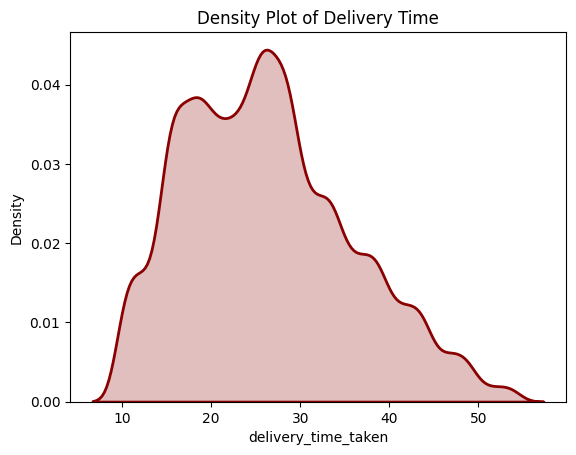

In [61]:
sns.kdeplot(data=dataset, x=target, shade=True, color="darkred", lw=2)
plt.title("Density Plot of Delivery Time")
plt.show()

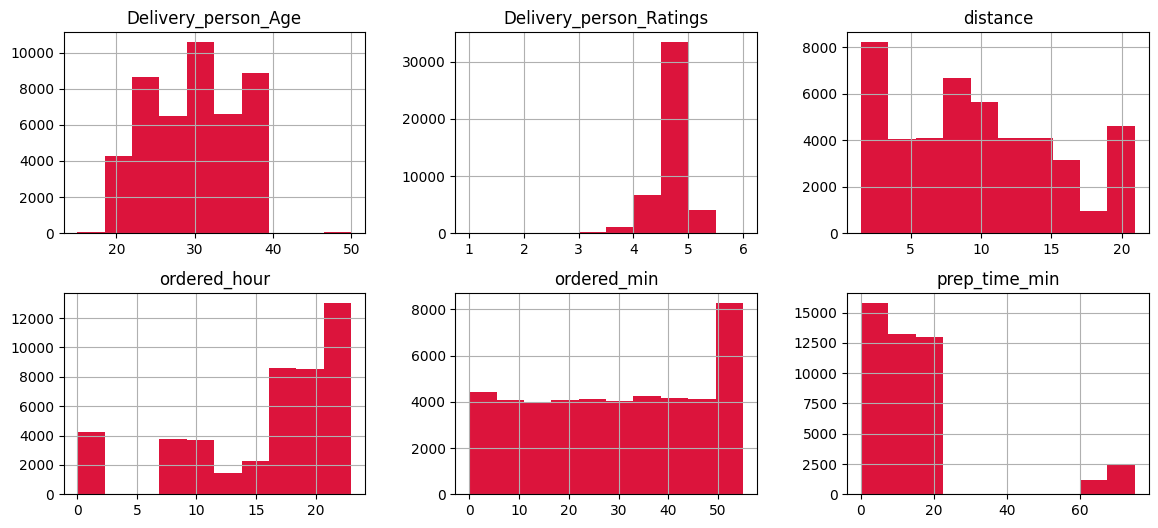

In [65]:
dataset[numerical_feature].hist(layout=(2,3), figsize=(14,6), color="crimson")
plt.show()

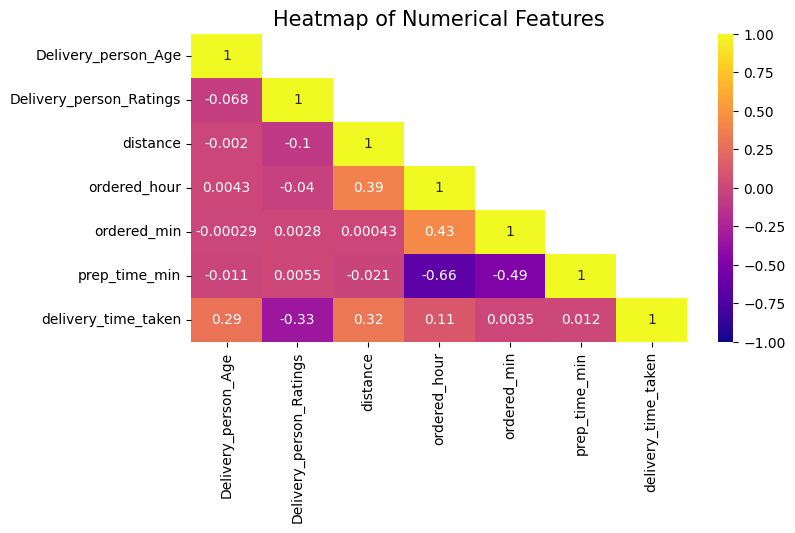

In [66]:
plt.figure(figsize=(8,4))

corr = dataset[numerical_feature +[target]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

np.fill_diagonal(mask, False)

sns.heatmap(corr, annot=True, mask=mask, 
    vmin=-1, vmax=1, cmap='plasma'
    )

plt.title("Heatmap of Numerical Features", fontsize=15)
plt.show()

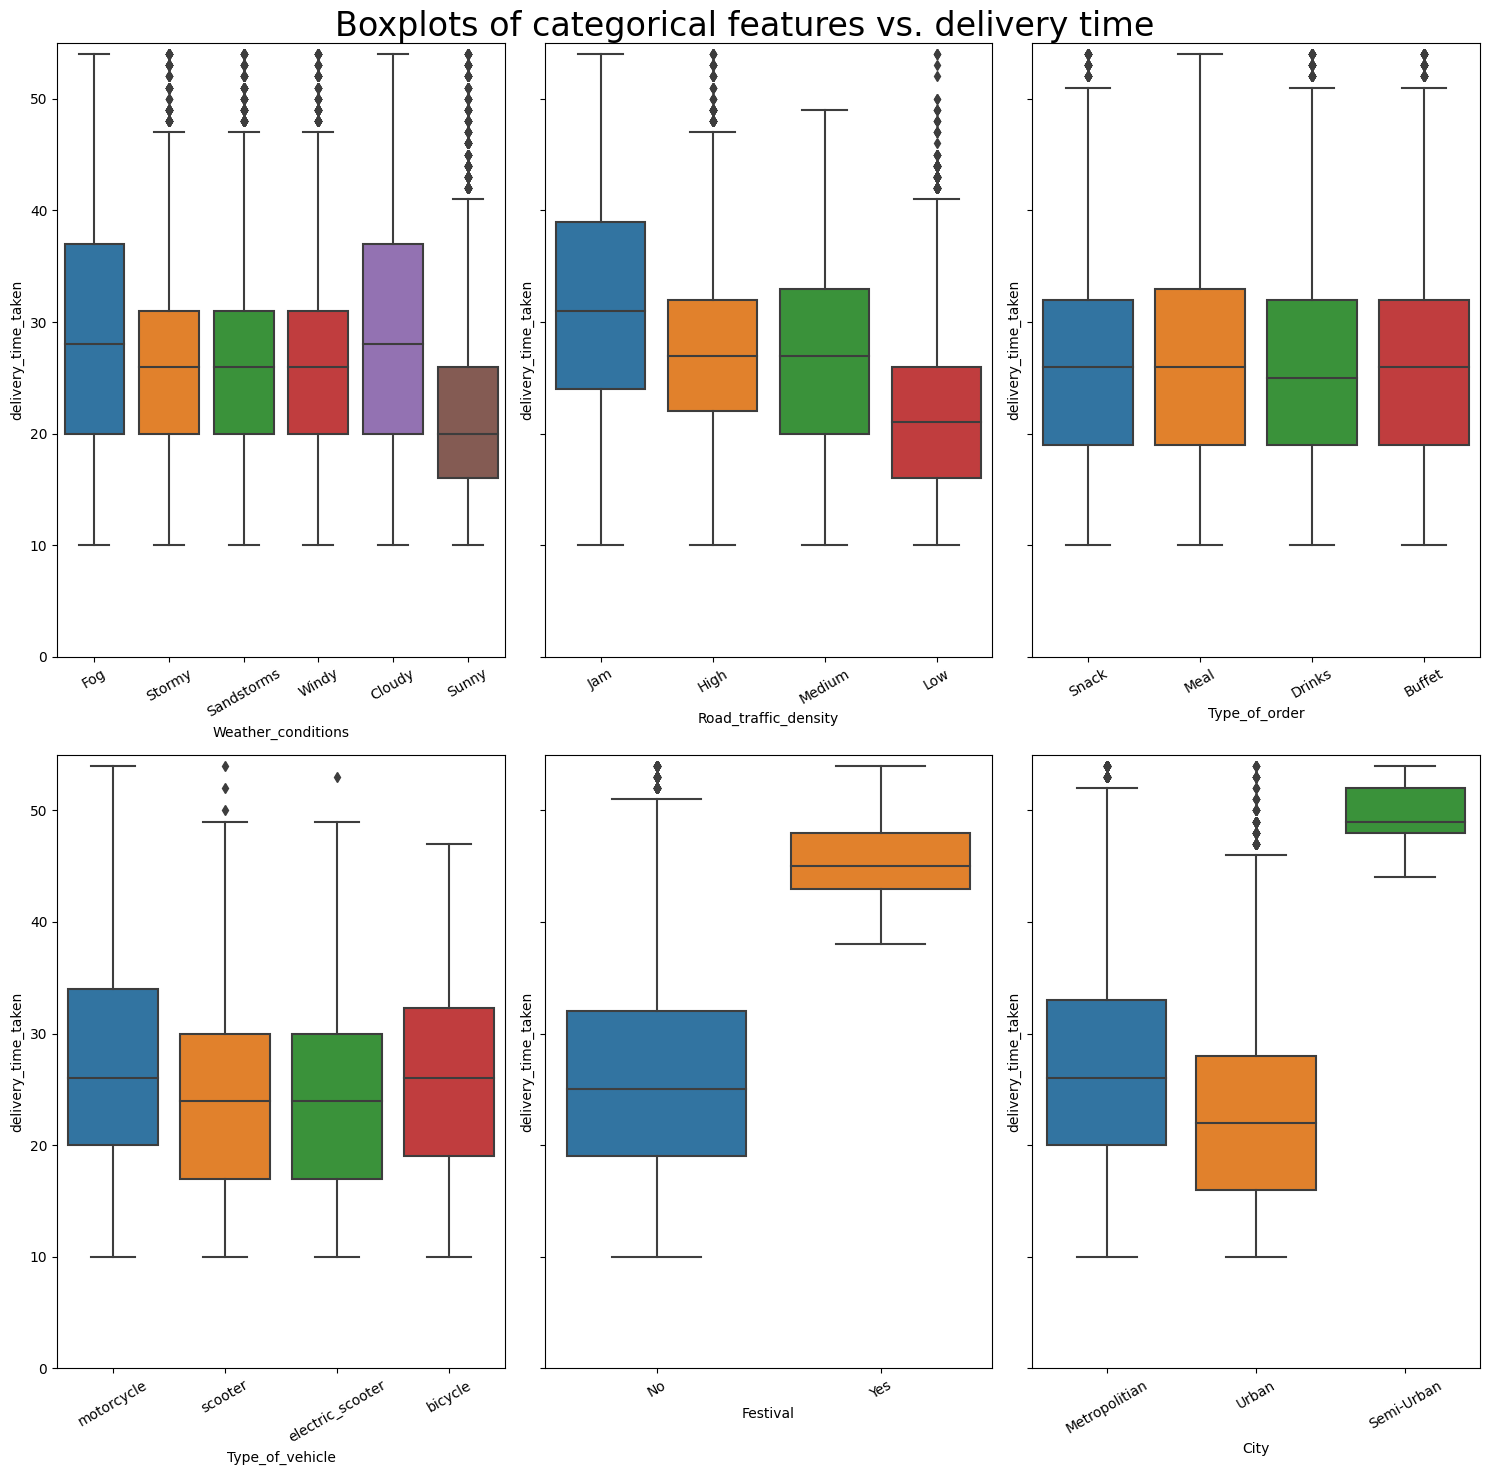

In [71]:
fig, ax = plt.subplots(2,3, figsize=(15,15), sharey=True)
fig.set_tight_layout(True)

row,col = 0,0

for var in categorical_feature:
    sns.boxplot(data=dataset, x=var, y=target, ax=ax[row,col])
    ax[row,col].set_ylim([0,55])
    xlabels = ax[row,col].get_xticklabels()
    ax[row,col].set_xticklabels(xlabels, size=10, rotation=30)

    if col < 2:
        col += 1 
    else:
        row += 1
        col = 0

# fig.delaxes(ax[2,3]) #delete empty plot
fig.suptitle("Boxplots of categorical features vs. delivery time", fontsize=24)
plt.show()

##### 3.4 Multivariate Analysis

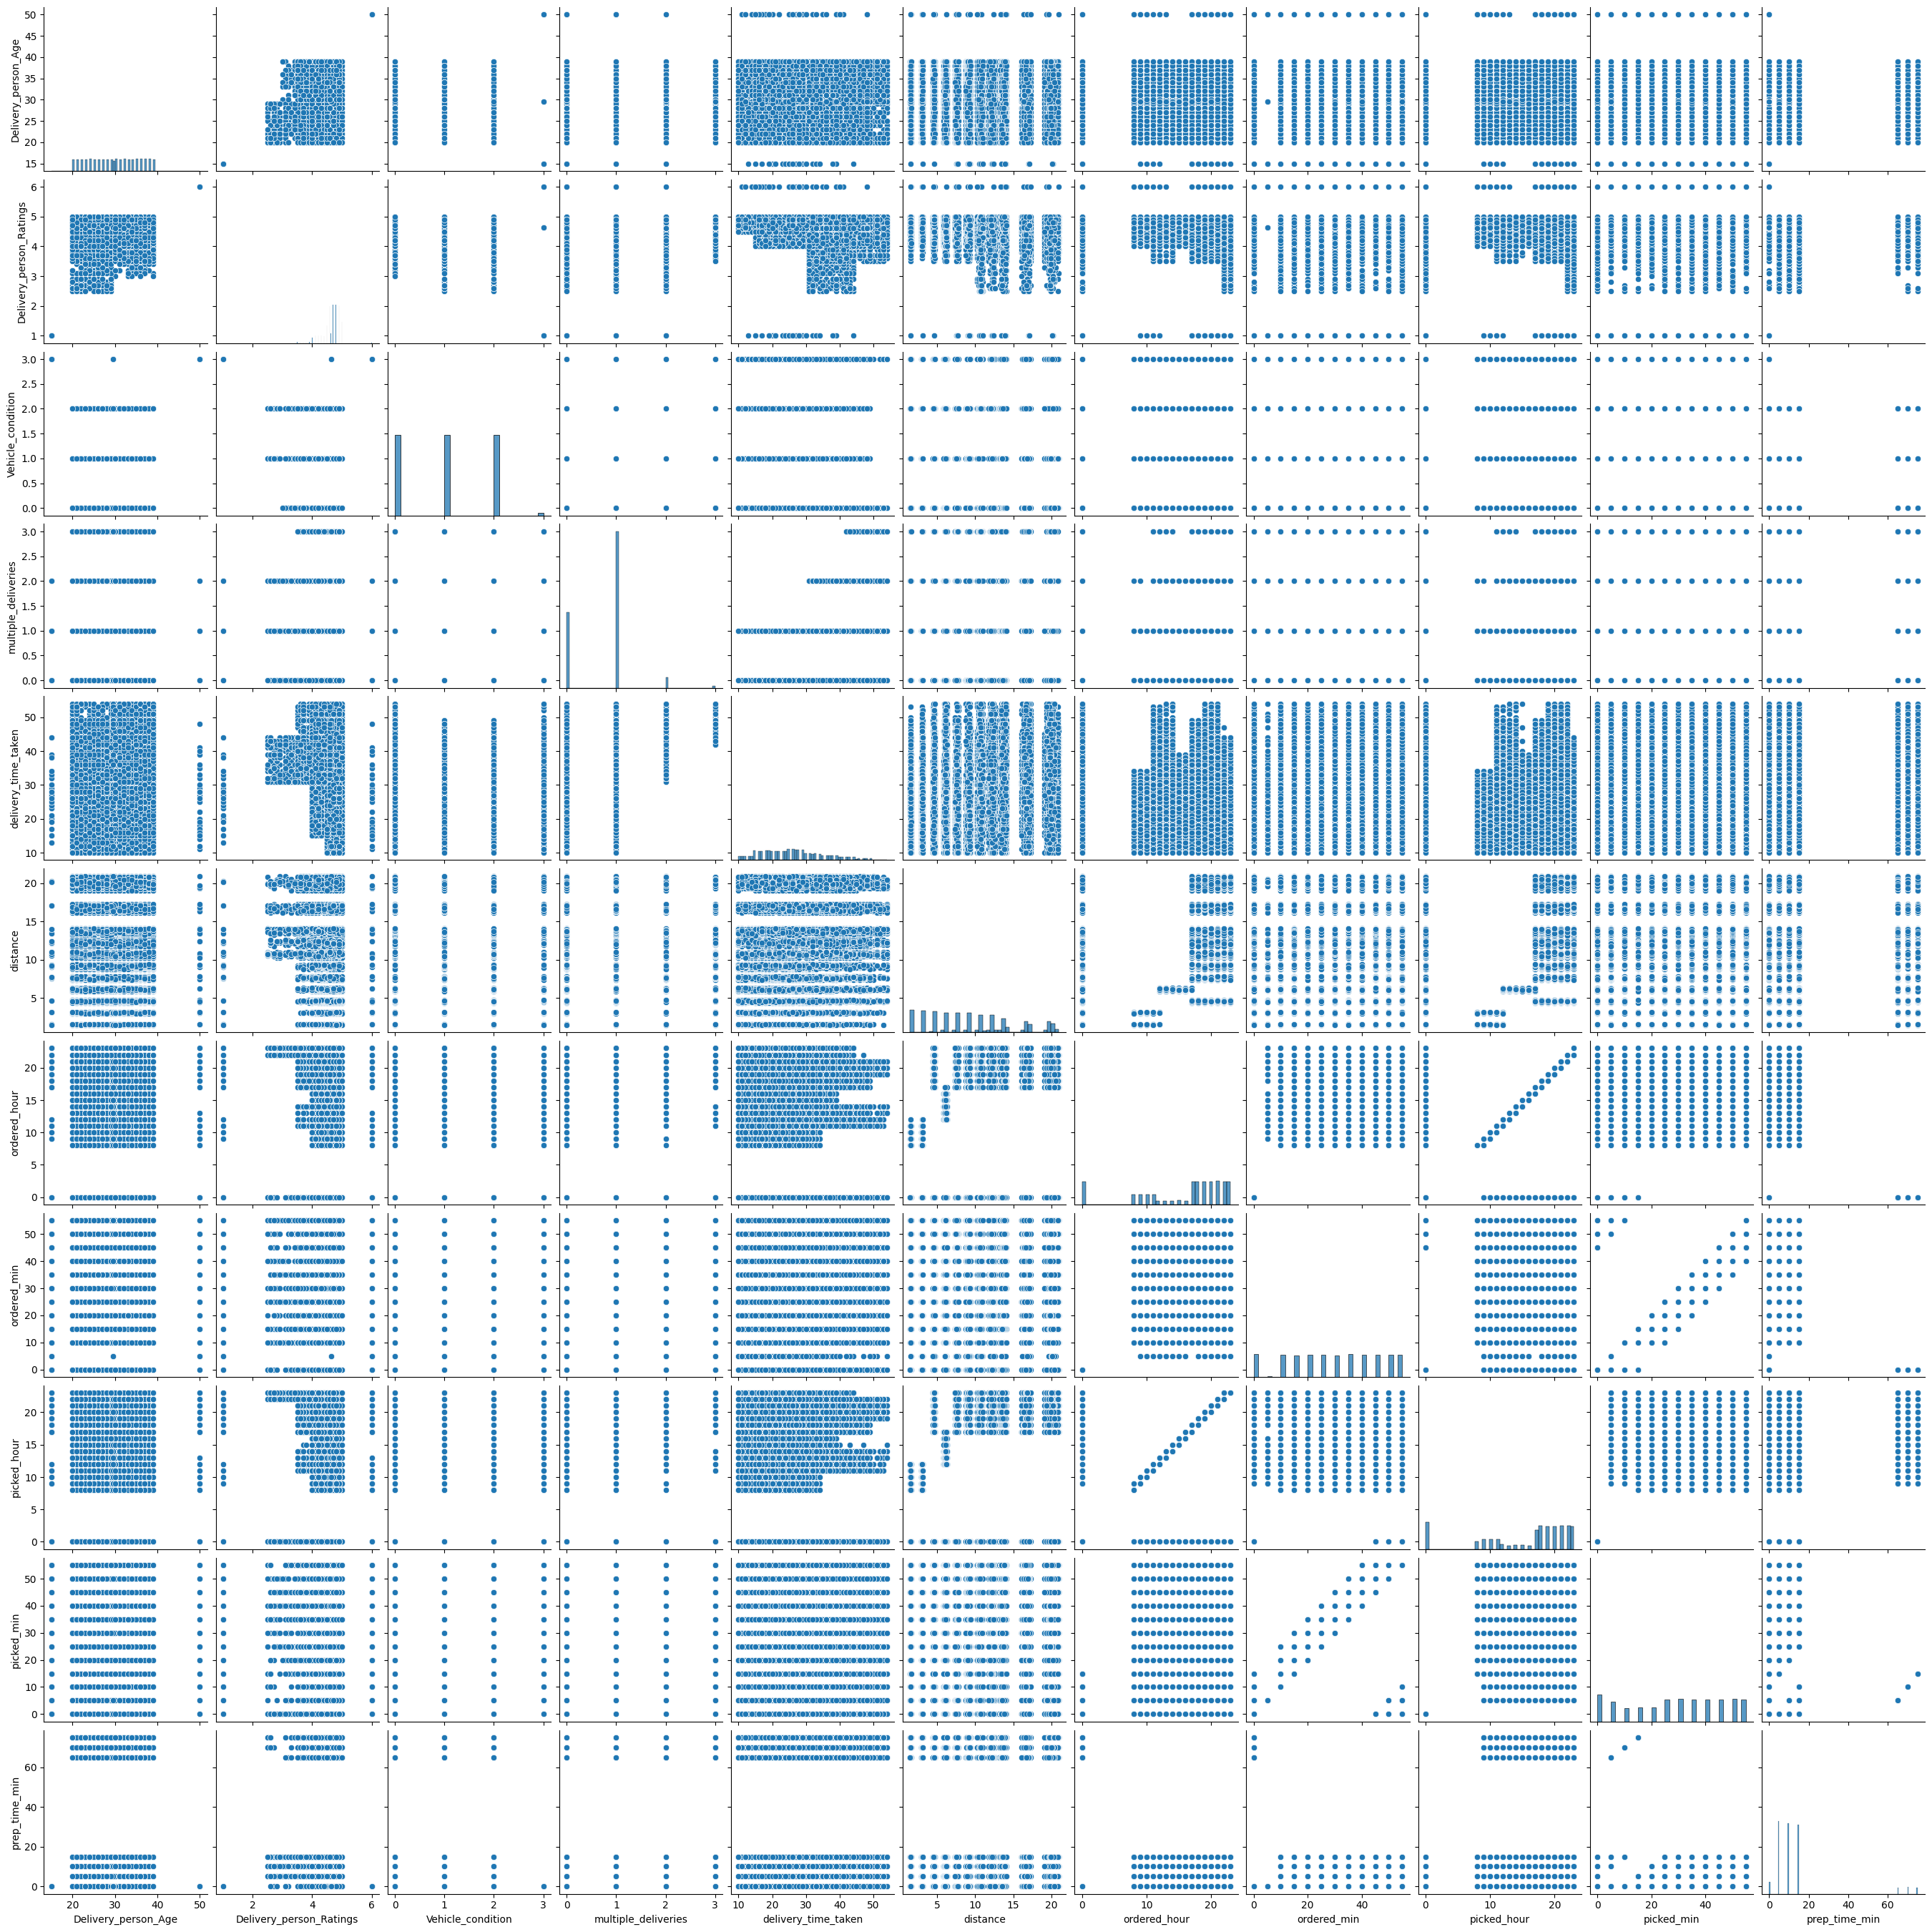

In [72]:
sns.pairplot(data=dataset)
plt.show()

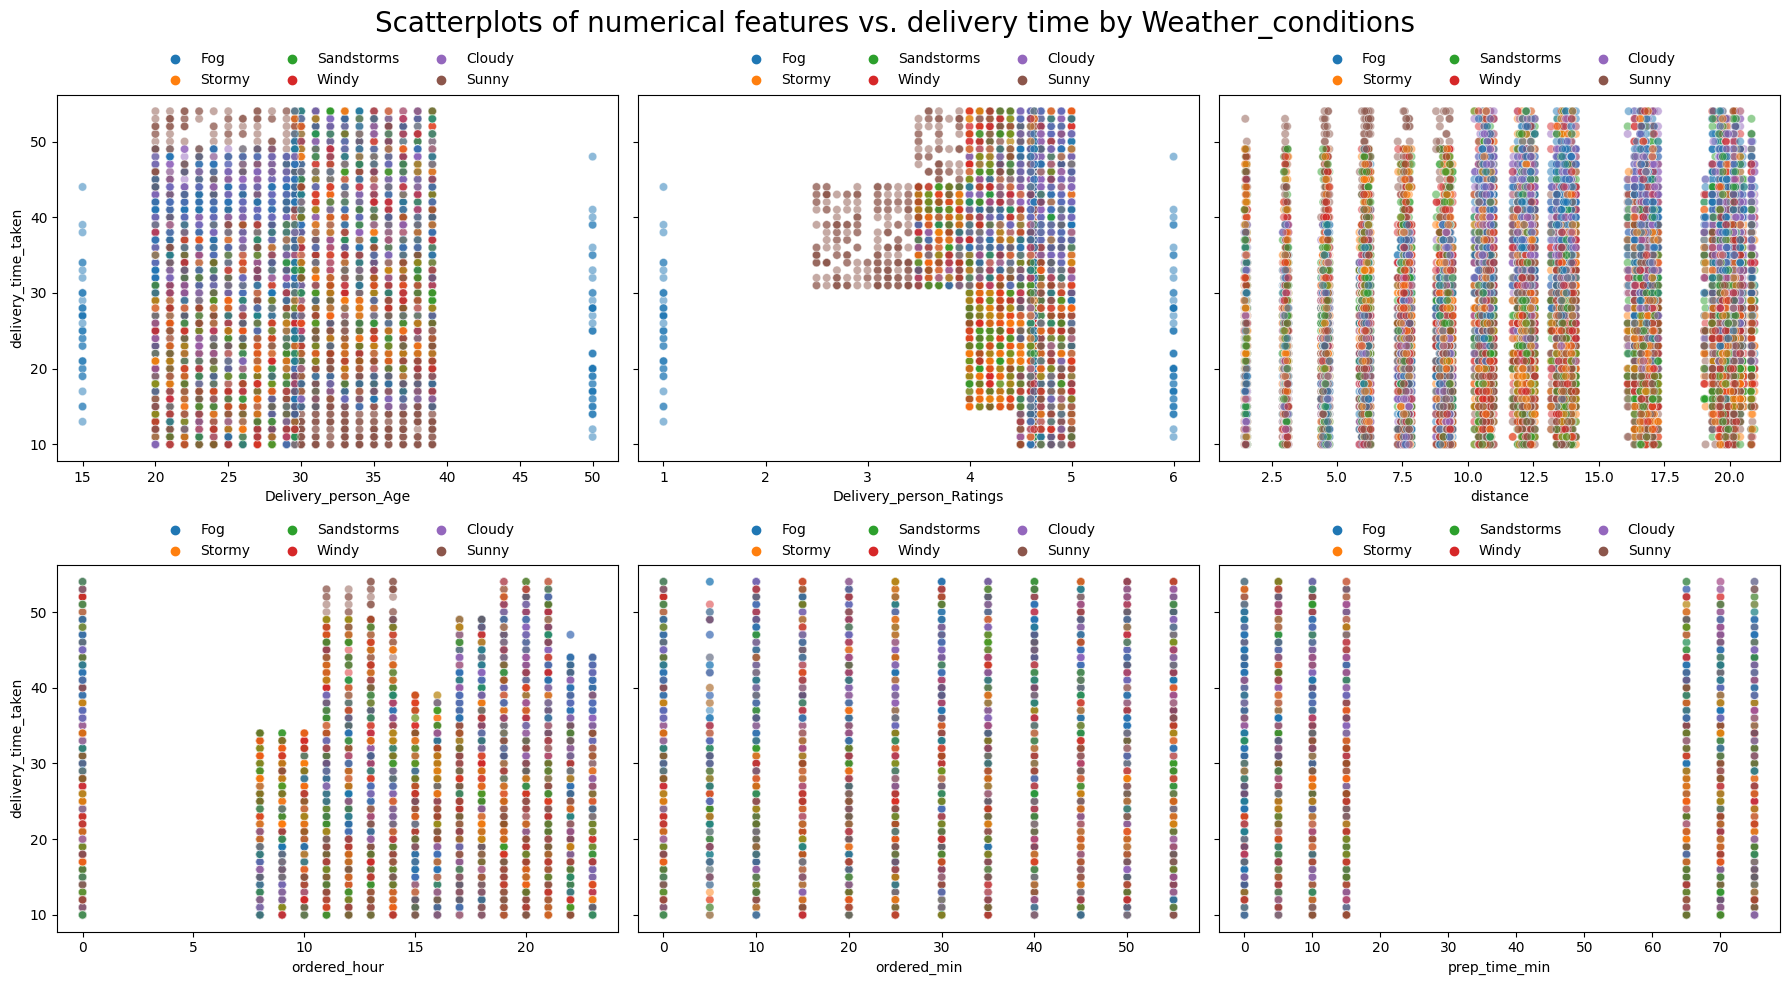

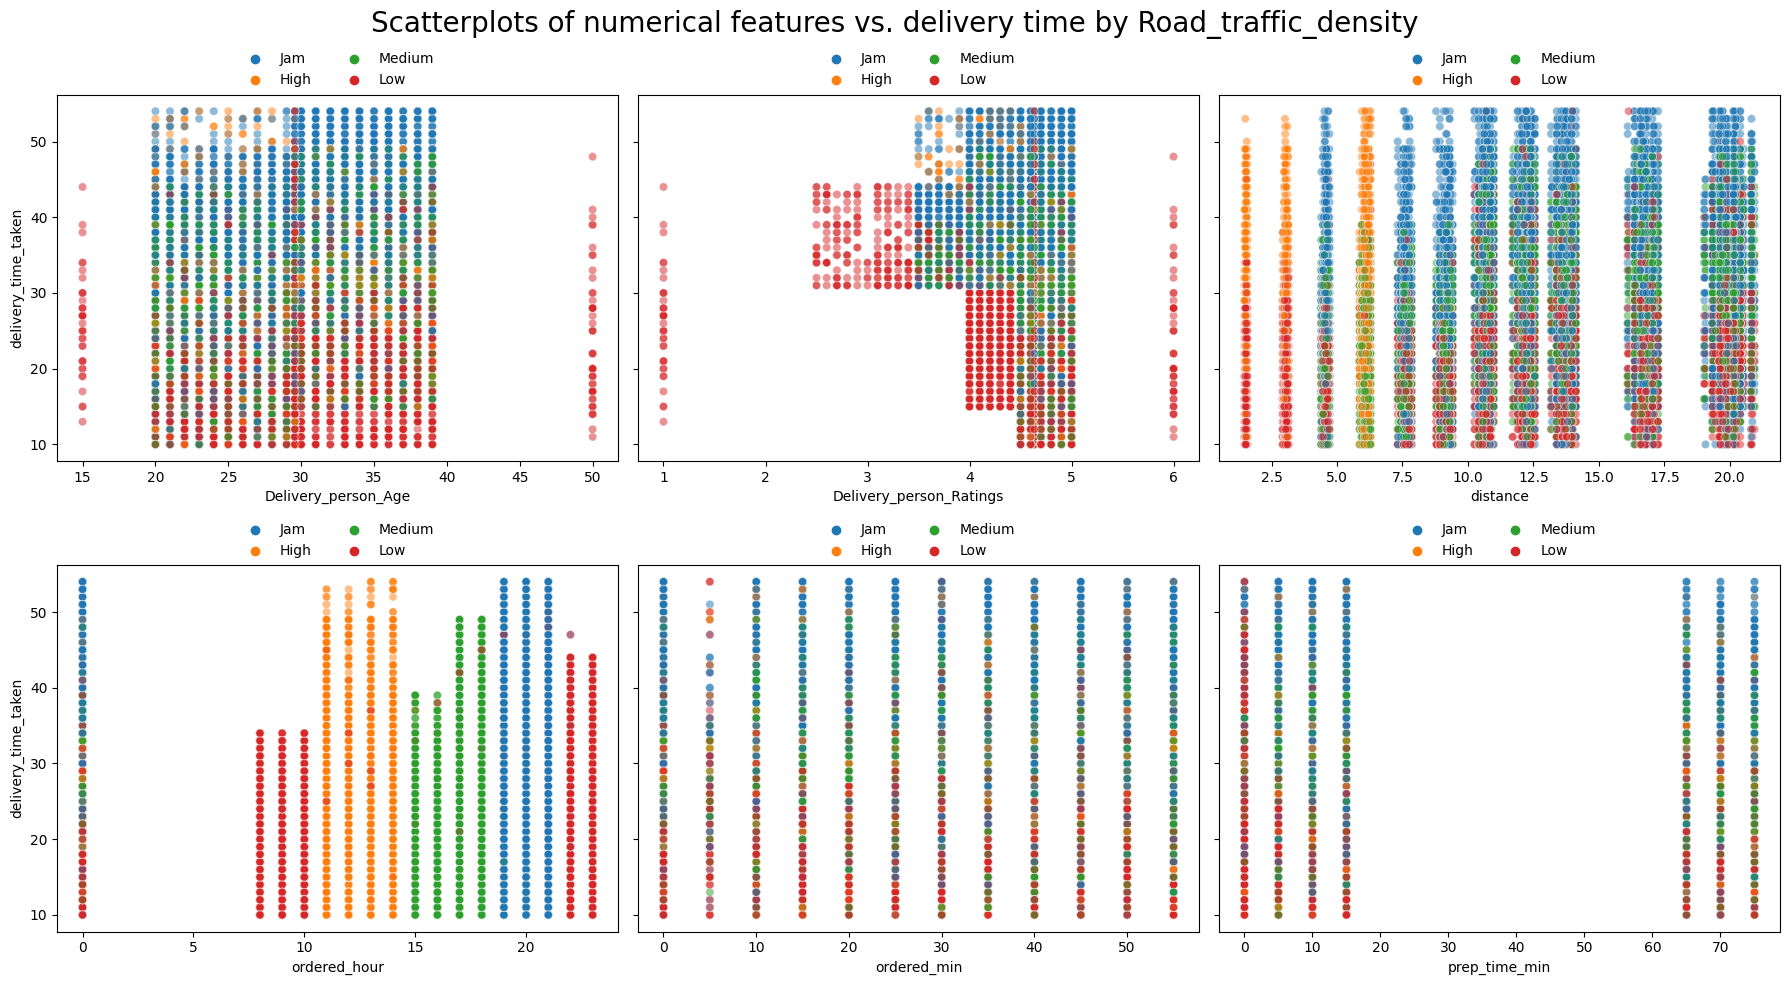

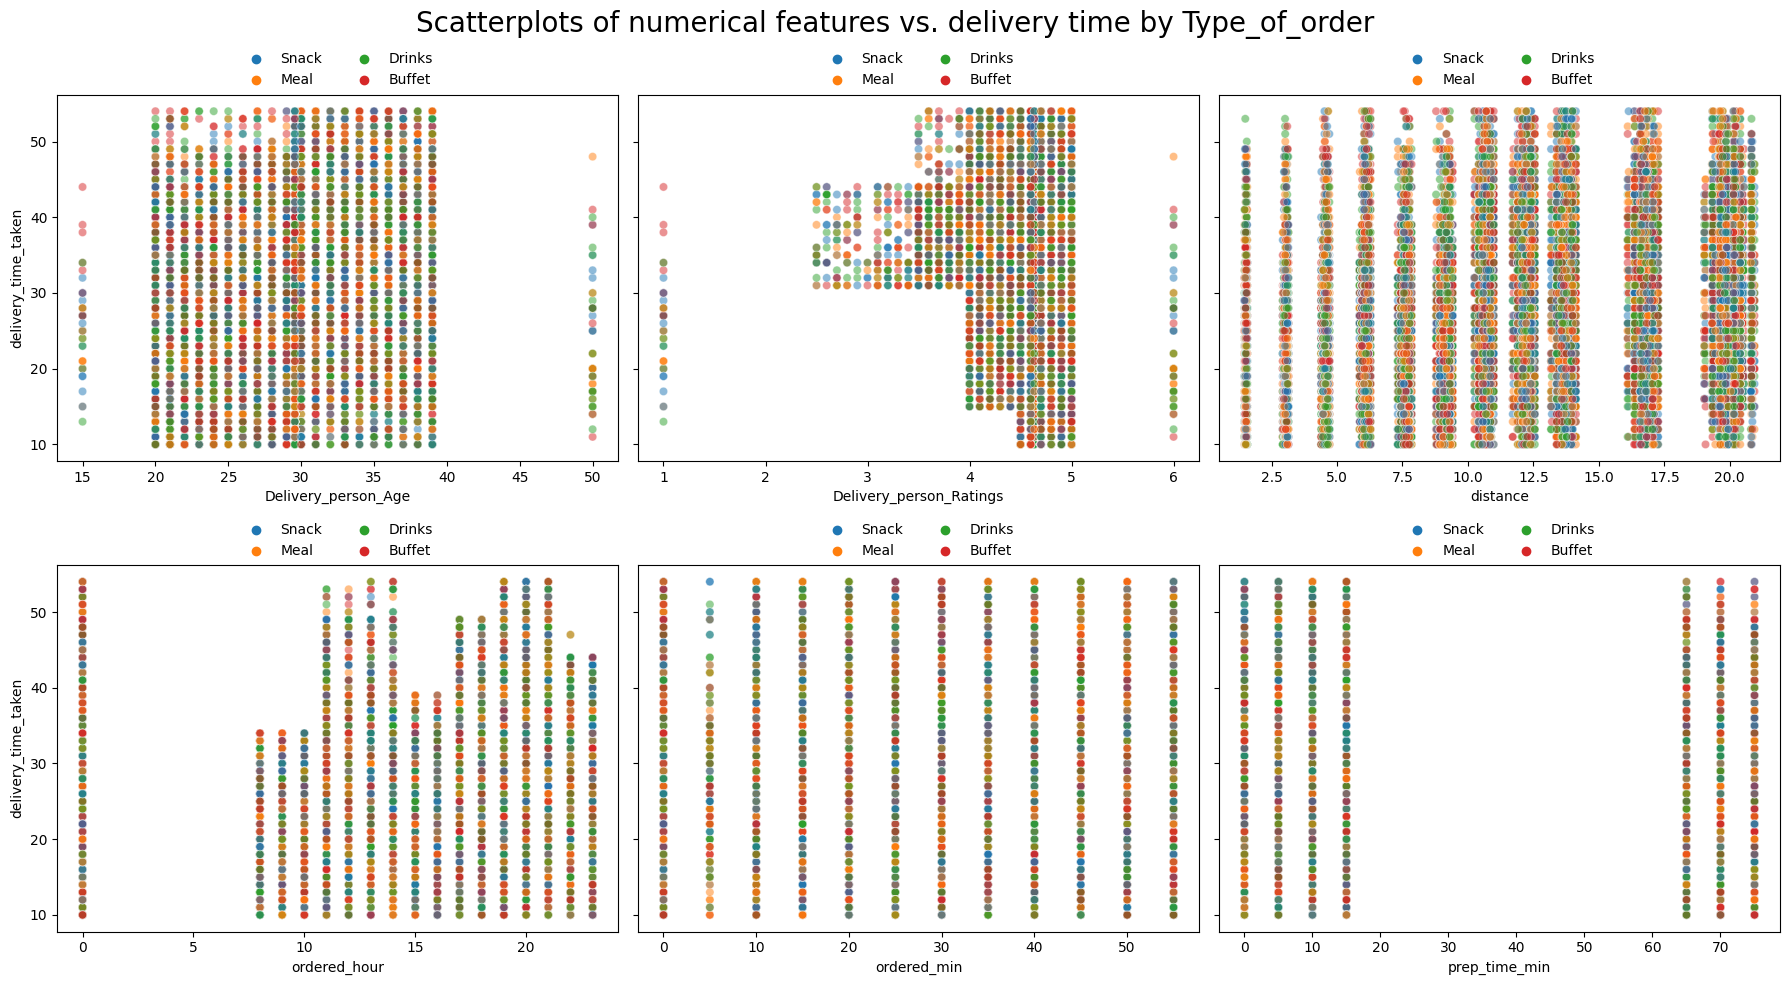

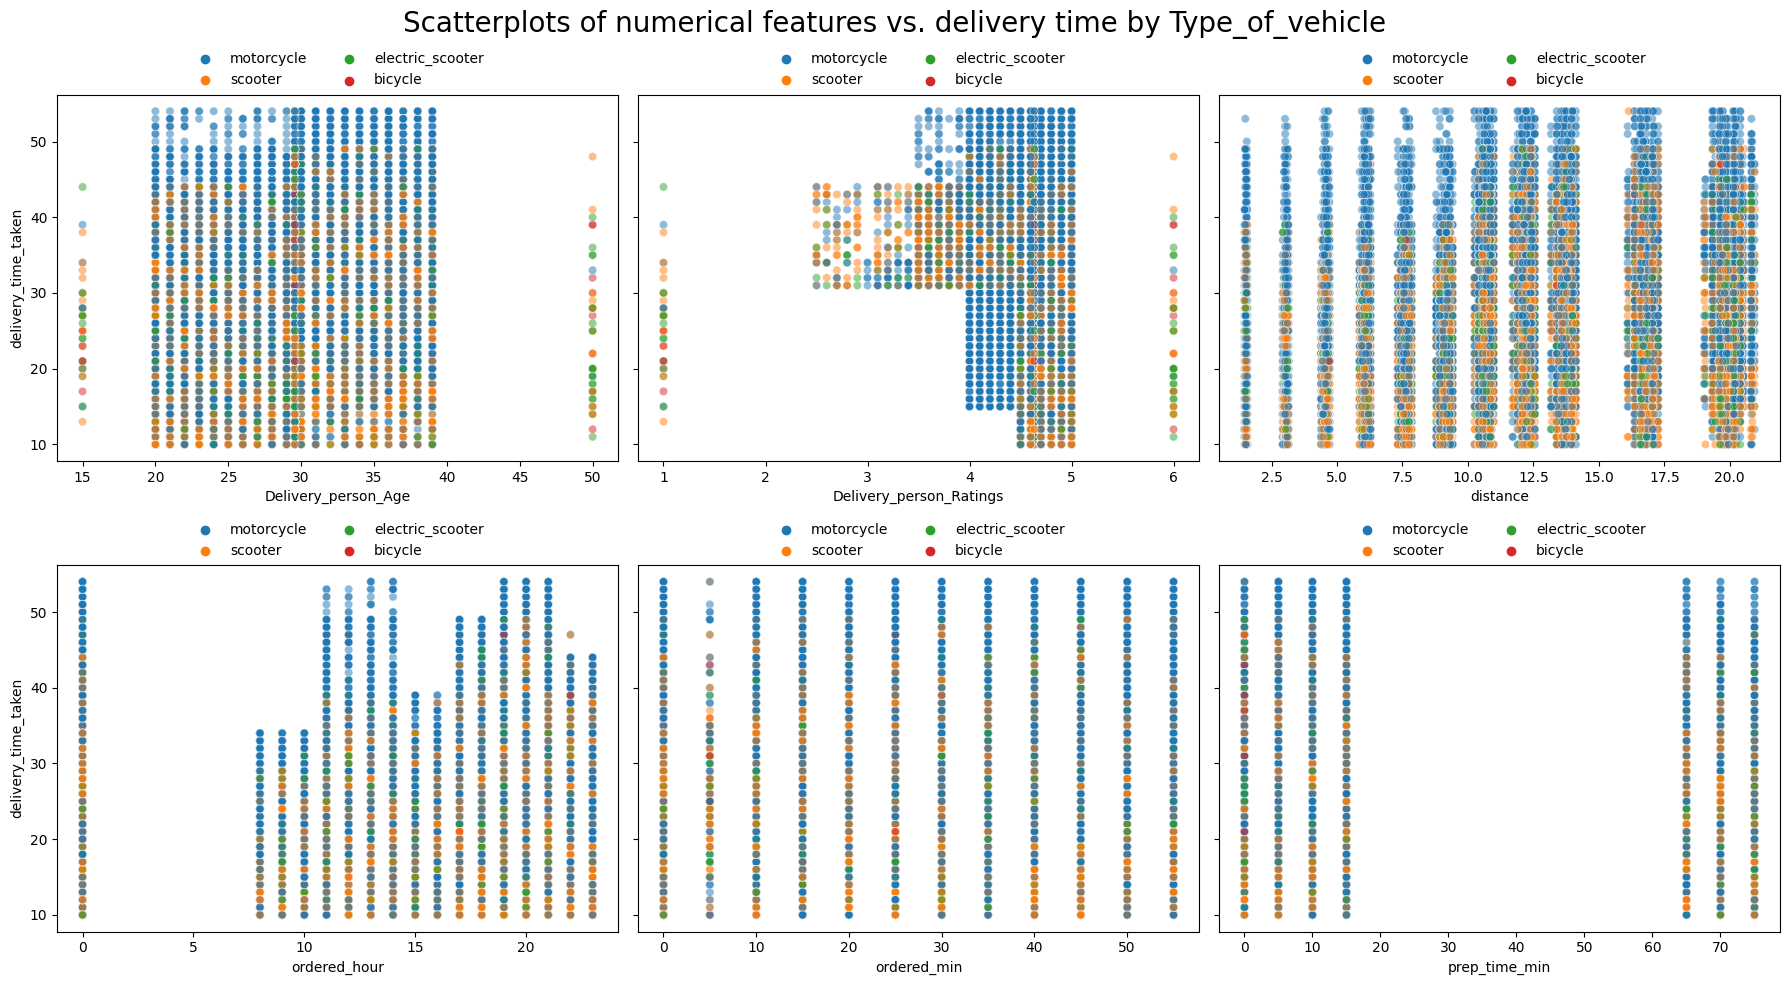

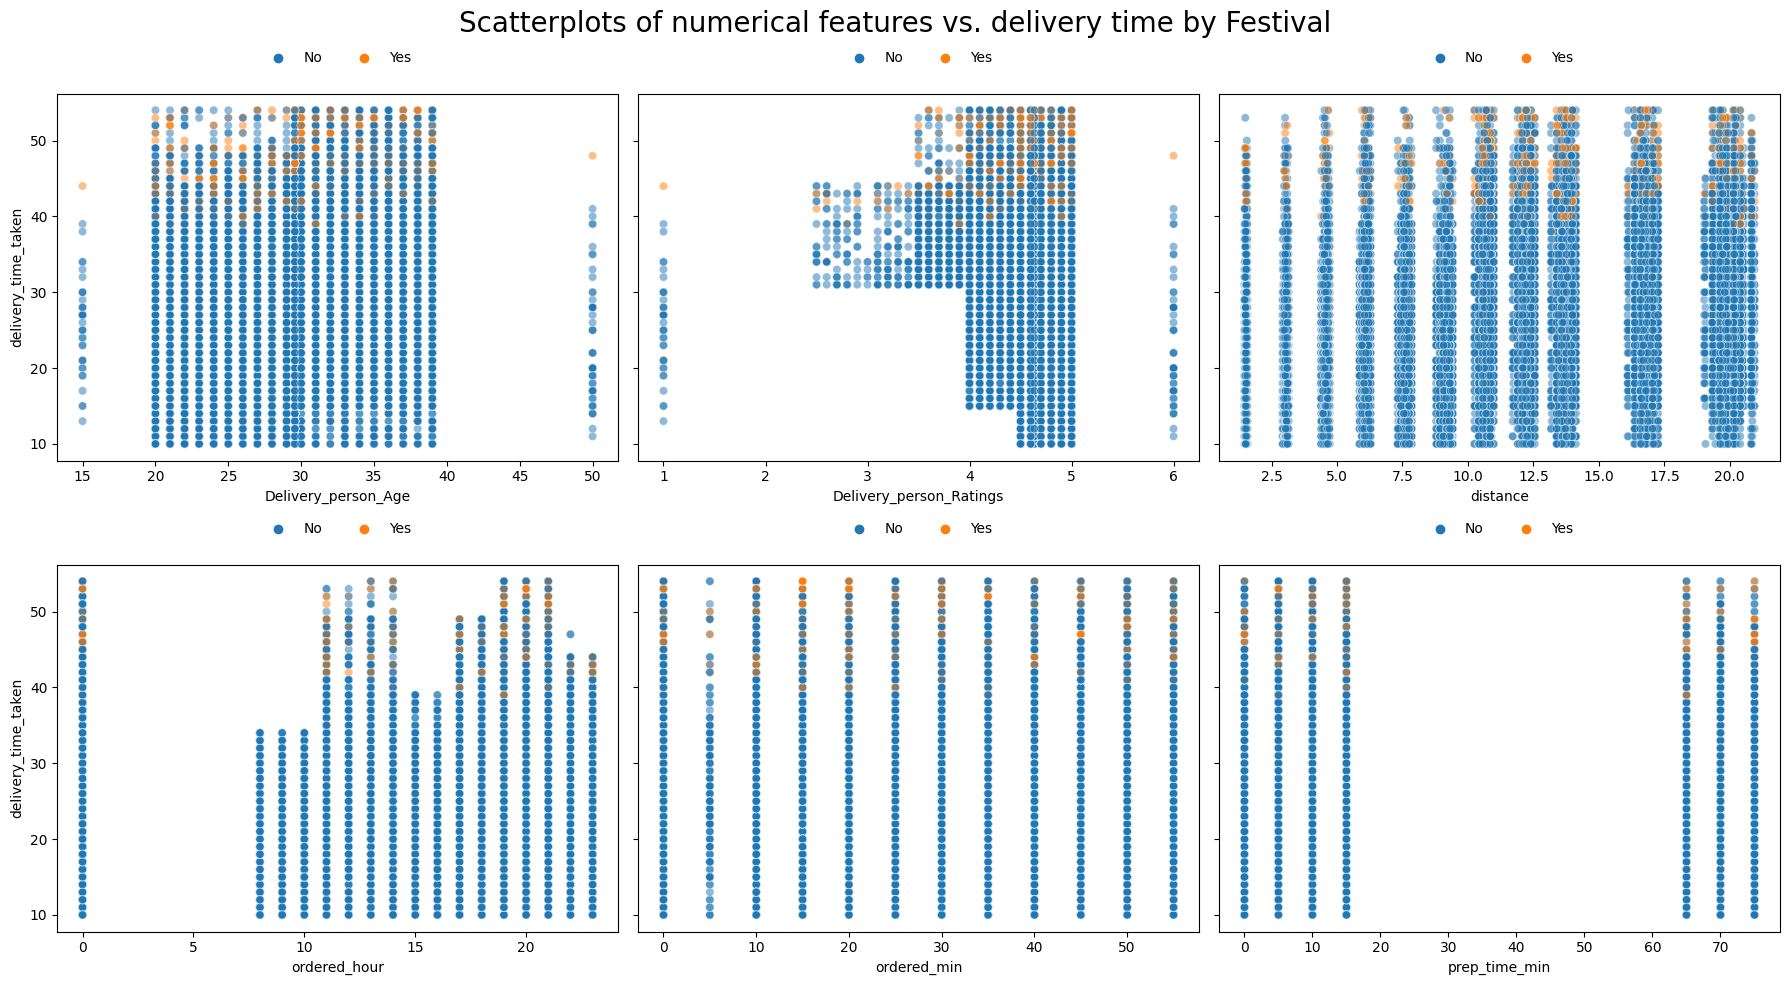

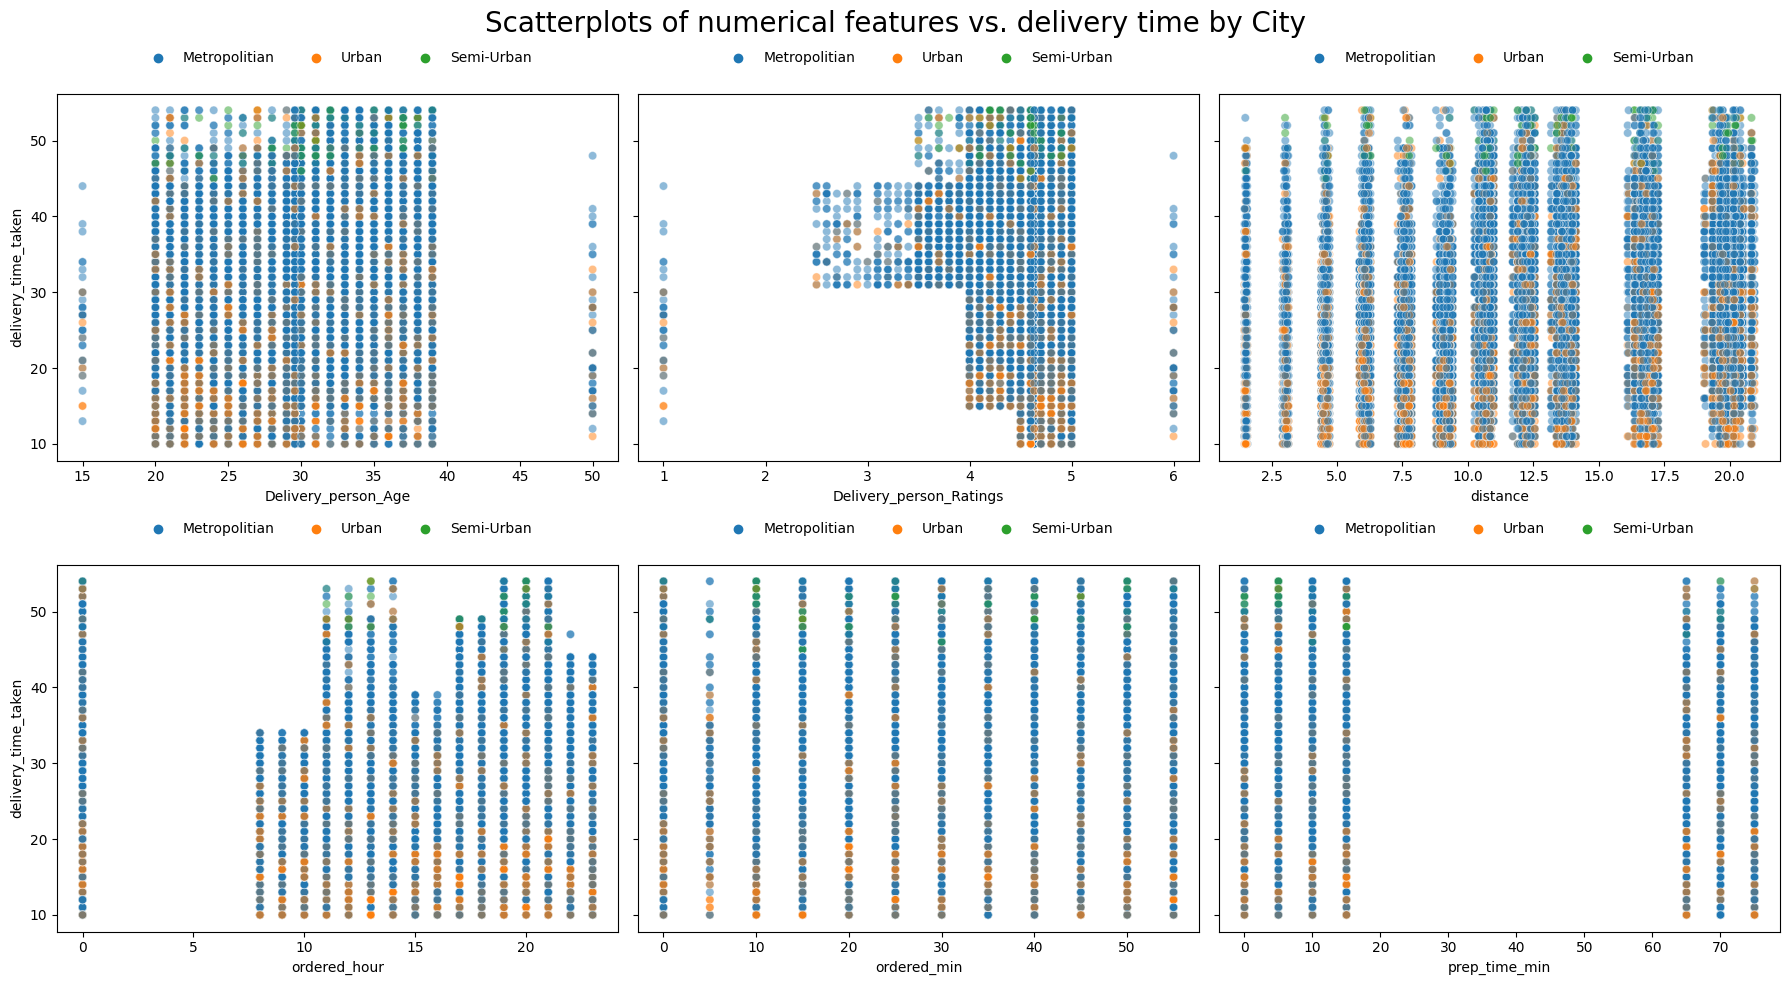

In [76]:
for category in categorical_feature:
    fig, ax = plt.subplots(2,3, figsize=(18,10), sharey=True)
    fig.set_tight_layout(True)

    row,col = 0,0

    for var in numerical_feature:
        sns.scatterplot(data=dataset, x=var, y=target, hue=category, ax=ax[row,col], alpha=0.5)
        
        ax[row,col].legend(
            loc='upper center',frameon=False, bbox_to_anchor=(0.5, 1.15), fontsize=10,
            ncol=len(dataset[category].unique()) if len(dataset[category].unique()) < 4 else len(dataset[category].unique())//2
            )
        
        if col < 2:
            col += 1 
        else:
            row += 1
            col = 0

    fig.suptitle(f'Scatterplots of numerical features vs. delivery time by {category}', fontsize=20)
    plt.show()

In [ ]:
['ID','Delivery_person_ID','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude',
'Order_Date','Time_Orderd','Time_Order_picked','Type_of_order']

In [ ]:
# Delivery_person_Age
# Delivery_person_Ratings
# Weather_conditions
# Road_traffic_density
# Vehicle_condition
# Type_of_vehicle
# multiple_deliveries
# Festival
# City
# delivery_time_taken
# prep-time
# distance